# Image clustering using K-means algorithm
-----


The K-means algorithm is a 2 step cost minimization process. The cost function is defined by:

\begin{align}
cost = \frac{1}{m} \sum_c \sum_k (x_k - \mu)^2 
\end{align}

and is basically the the average euclidean distance (square) between the centroid of class *c* and the respective points that below to the same class.

The *(x, y)* coordinate of the centroid with label *c* is given by:

\begin{align}
\mu_c (x, y) = \left[\frac{1}{m}\sum_k x_k, \frac{1}{m} \sum_k y_k \right]
\end{align}




## Use cases:

1) **Behavioral segmentation**: Segmentation by online/offline activities, Define personas based on interest, Create profiles based on activity monitoring)

2) **Inventory categorization**: Group inventory by a particular feature

3) **Sorting sensor measurements**: Detect activity types in motion sensors

4) **Group images**

5) **Separate audio**

6) **Identify groups in health monitoring**

7) **Detecting anomalies**: Separate valid activity groups from bots, Group valid activity to clean up outlier detection


In addition, monitoring if a tracked data point switches between groups over time can be used to detect meaningful changes in the data.



In [1]:
# Required libraries

%matplotlib inline
from PIL import Image
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math as math

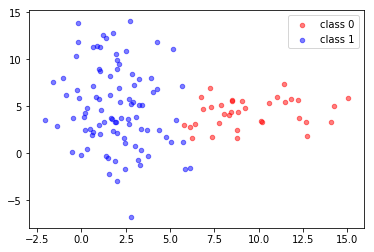

In [2]:
# Build and plot dataset: 2 clusters
n_pts0, n_pts1 = np.random.randint(20, 100, 2)
x0 = np.random.normal(10, 3, n_pts0)
y0 = np.random.normal(5, 1.7, n_pts0)
data = list(zip(x0, y0))
n_points = np.random.randint(20, 100, 1)
x1 = np.random.normal(2, 2, n_pts1)
y1 = np.random.normal(6, 4, n_pts1)
data += list(zip(x1, y1))


plt.scatter( x0, y0, s=20, c="r", alpha=0.5, label="class 0" )
plt.scatter( x1, y1, s=20, c="b", alpha=0.5, label="class 1")
plt.legend()
plt.show()

In [3]:
class KMeans():
    """
    K-means algorith
    """
    
    def __init__(self, centroids, data, threshold ):
        #Initialize: append 0 label to all data point [x, y, 0]
        self.data = np.zeros( (len(data), 3) )
        self.data[:,0:2] = data
        self.centroids = centroids
        self.threshold = threshold
        self.history ={'cost':list()}
        self.cost = 10000
        if self.centroids.shape[0] < 2:
            raise ValueError("Minimum number of centroids must be above 2.")
            
        
    def pairing_point2centroid(self):
        '''
         pair each data point to the closest centroid
         min [(x-xc)**2 + (y - yc)**2]
        '''
        for row in range( self.data.shape[0]):
            num_centroids = self.centroids.shape[0]
            pt = self.data[row, 0:2]
            distance = np.tile(pt, (num_centroids,1)) - centroids[:,0:2]
            distance = np.square(distance)
            distance = np.mean( distance, axis=1 )
            this_label = np.argmin(distance)
            self.data[row,2] = this_label
            
            
    def update_centroid_pos(self):
        '''
        Take the average position of all points from same centroid and update centroid coordinates
        '''
        for row in range( self.centroids.shape[0]):
            mean_pos = self.data[ self.data[:,2] == self.centroids[row,2] ][:,0:2]
            mean_pos = np.mean( mean_pos, axis = 0)
            #update
            self.centroids[row, 0:2] = mean_pos

            
    def cost_fn(self):
        """
        Cost function to evaluate the performance of the model
        Calculate the aggregate distance from a point to its associated centroid
        
        """
        self.cost = 0
        for row in range( self.centroids.shape[0]):
            centroids_coord = self.centroids[row,0:2]
            distance = self.data[ self.data[:,2] == self.centroids[row,2] ][:,0:2]
            num_points = distance.shape[0]
            distance = distance - np.tile(centroids_coord, (num_points, 1))
            distance = np.square( distance )
            distance = np.sum(distance, axis=1)
            distance = distance**0.5
            self.cost += 1. / num_points * np.sum( distance )
    
    def fit(self):
        #c= True
        iteration = 0
        last_cost = -10**6
        while np.abs(self.cost - last_cost) > self.threshold:
            last_cost = self.cost
            self.pairing_point2centroid()
            self.update_centroid_pos()
            self.cost_fn()
            self.history["cost"].append(self.cost)
            iteration += 1
            print("Iteration {} | cost {:.2f} | Delta cost {:.2f}".format(iteration, self.cost, (self.cost - last_cost)) )
            color=["r", "b", "g"]
            for c in range(self.centroids.shape[0]):
                plt.scatter(self.data[self.data[:,2] == c][:,0], self.data[self.data[:,2] == c][:,1], c=color[c], s=20, alpha= 0.5)
            plt.scatter(kmean_model.centroids[:,0], kmean_model.centroids[:,1], s=80, c="cyan", alpha=0.8)
            plt.show()

List of initialized centroids: [[-4.57394593  1.95064383  0.        ]
 [ 4.28522866 -3.71965421  1.        ]]
Iteration 1 | cost 7.57 | Delta cost -9992.43


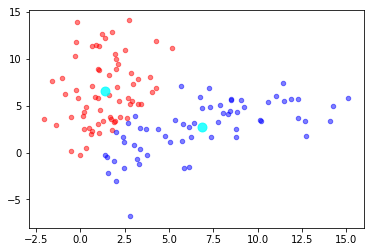

Iteration 2 | cost 7.57 | Delta cost -0.01


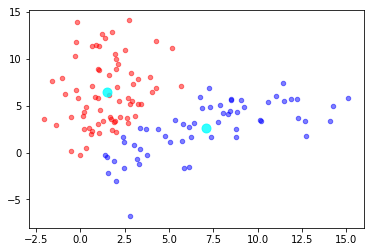

Iteration 3 | cost 7.57 | Delta cost 0.00


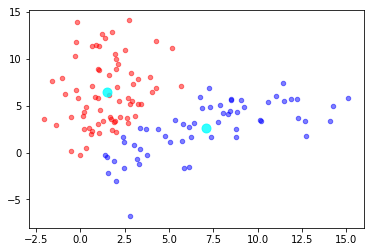

In [4]:
# Get coordinates of centroids by Randomly sampling from a uniform distribution between 
#the smallest and largest value in the dataset
num_class = 2
start = np.min(data)
stop = np.max(data)
centroids = np.random.uniform(start,stop, (num_class, 3))
thresh = 10**-6 #threshold in change of cost to continue iterating
#Assign an integer to each class label
c = 0
for r in range(centroids.shape[0]):
    centroids[r, 2] = c
    c += 1
print("List of initialized centroids: {}".format(centroids) )


kmean_model = KMeans(centroids, data, thresh)
kmean_model.fit()
my_data = kmean_model.data

### Dataset with 3 Clusters

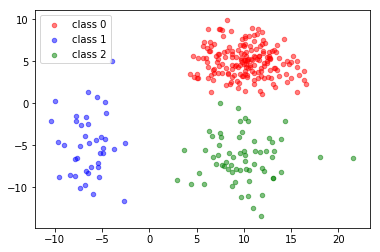

[[  8.10160083   3.60787656   0.        ]
 [ -1.21397687  -8.68189854   1.        ]
 [ -3.32685263 -11.95690829   2.        ]]
Iteration 1 | cost 14.01 | Delta cost -9985.99


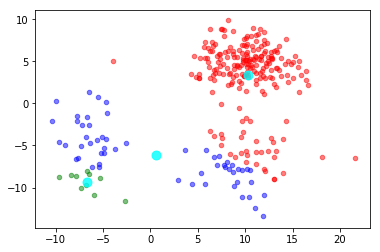

Iteration 2 | cost 11.89 | Delta cost -2.12


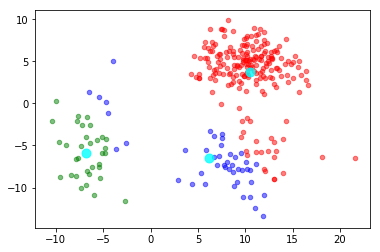

Iteration 3 | cost 9.84 | Delta cost -2.06


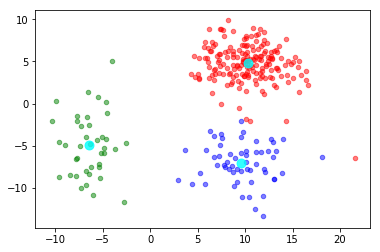

Iteration 4 | cost 9.95 | Delta cost 0.12


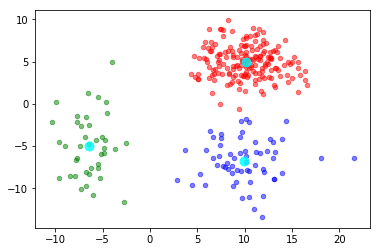

Iteration 5 | cost 9.95 | Delta cost 0.00


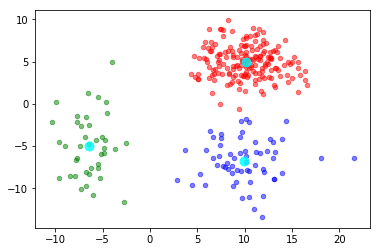

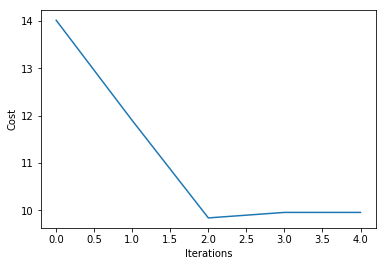

In [8]:
# Build dataset
# Build and plot dataset: 2 clusters
n_pts0, n_pts1, n_pts2 = np.random.randint(20, 200, 3)
x0 = np.random.normal(10, 3, n_pts0)
y0 = np.random.normal(5, 1.7, n_pts0)
data = list(zip(x0, y0))
x1 = np.random.normal(0-6, 2, n_pts1)
y1 = np.random.normal(-5, 4, n_pts1)
data += list(zip(x1, y1))
x2 = np.random.normal(10, 3.5, n_pts2)
y2 = np.random.normal(-6, 3, n_pts2)
data += list(zip(x2, y2))

plt.scatter( x0, y0, s=20, c="r", alpha=0.5, label="class 0" )
plt.scatter( x1, y1, s=20, c="b", alpha=0.5, label="class 1")
plt.scatter( x2, y2, s=20, c="g", alpha=0.5, label="class 2")
plt.legend()
plt.show()
start = np.min(data)
stop = np.max(data)
centroids = np.random.uniform(start,stop,(3, 3))
centroids[0, 2], centroids[1, 2], centroids[2, 2] = 0, 1, 2
print(centroids)
thresh = 10**-4
kmean_model = KMeans(centroids, data, thresh)
kmean_model.fit()

hist_cost = kmean_model.history["cost"]
plt.plot( np.arange(len(hist_cost)), hist_cost )
plt.xlabel("Iterations")
plt.ylabel("Cost")